In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats

## Dependencies for zip code plotting 
import pandas_bokeh
import pgeocode
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

import plotly.graph_objects as go
import plotly.figure_factory as ff

In [35]:
nomi = pgeocode.Nominatim('us')
#import csv files
c22 = pd.read_csv('Resources/census22.csv')
c22['zip code'] = c22['zip code tabulation area'].astype(str).str.zfill(5)
c22['lat'] = (nomi.query_postal_code(c22['zip code'].tolist()).latitude)
c22['lon'] = (nomi.query_postal_code(c22['zip code'].tolist()).longitude)


#display full dataframe
c22.drop(columns='Unnamed: 0')
us = pd.DataFrame(c22)


In [36]:
us.drop(us.loc[us['Median gross rent']<=0].index, inplace=True)
us['Median gross rent']


0        401.0
1        459.0
2        448.0
3        394.0
4        524.0
         ...  
33767    922.0
33768    750.0
33770    865.0
33771    807.0
33773    966.0
Name: Median gross rent, Length: 26143, dtype: float64

## Median gross rent vs population (national)

In [37]:
def plot_linear_regression(x, y, x_label, y_label,title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    plt.scatter(x, y)
    plt.plot(x, line, '--', color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.1, 0.1, equation, transform=plt.gca().transAxes, color='red')
    
    plt.savefig('Visuals/' + title +'.png')
    plt.show()
    print('p-value: ',p_value)
    print('r-value: ', r_value)

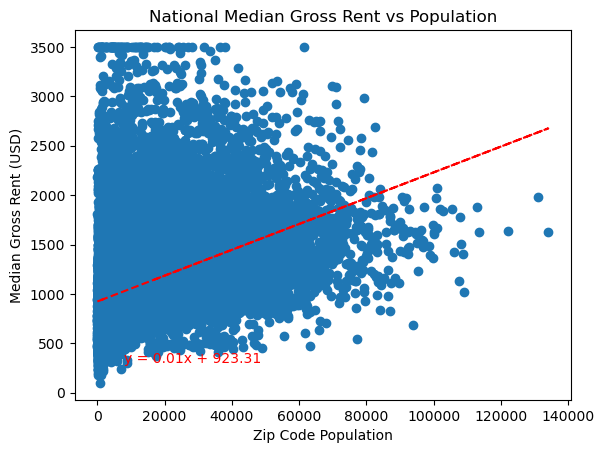

p-value:  0.0
r-value:  0.43210518678077126


In [38]:
us_rent = us['Median gross rent']
us_population = us['Population']

plot_linear_regression(us_population, us_rent, 'Zip Code Population','Median Gross Rent (USD)','National Median Gross Rent vs Population')

In [40]:
us_map = us.hvplot.points("lon", 
                                "lat", 
                                geo = True,
                               color = "Median gross rent",
                               alpha = 0.8,
                               tiles = "OSM",
                            
                               #frame_width = 700,
                               #frame_height = 500,
                               #size = "Poverty Count",
                               hover_cols = ["zip code", 'Median gross rent']
                                  )

# Display the map
us_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (Median gross rent,zip code)

## % poverty vs population  (national)

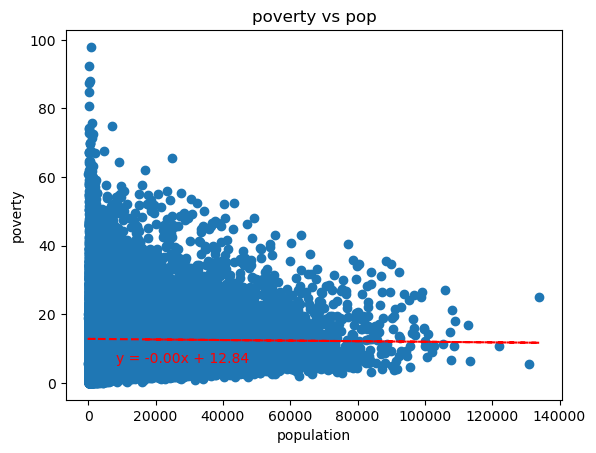

p-value:  0.013081334493439064
r-value:  -0.015347584626687226


In [8]:
poverty = us['Poverty Count']/us['Population']*100
population = us_population
plot_linear_regression(population, poverty, 'population', 'poverty', 'poverty vs pop')

## % poverty vs median gross rent

In [ ]:
plot_linear_regression(us_rent, poverty, 'median rent','poverty')

## The midwest

In [9]:
states = c22[['Poverty Count', 'Population','Median gross rent', 'zip code tabulation area', 'zip code', 'lat', 'lon']]
states.drop(states.loc[states['Median gross rent']<=0].index, inplace=True)

In [10]:
mn = states.loc[(states['zip code tabulation area'] >= 55001) & (states['zip code tabulation area']<= 56763)]
mn['state'] = "MN"

ia = states.loc[((states['zip code tabulation area'] >= 50001) & (states['zip code tabulation area']<= 52809) | (states['zip code tabulation area']>=68119) & (states['zip code tabulation area']<= 68120))]
ia['state'] = 'IA'

mi = states.loc[(states['zip code tabulation area'] >= 48001) & (states['zip code tabulation area']<= 49971)]
mi['state'] = "MI"

nd = states.loc[(states['zip code tabulation area'] >= 58001) & (states['zip code tabulation area']<= 58856)]
nd['state'] = "ND"

sd = states.loc[(states['zip code tabulation area'] >= 57001) & (states['zip code tabulation area']<= 57799)]
sd['state'] = "SD"

ks = states.loc[(states['zip code tabulation area'] >= 66002) & (states['zip code tabulation area']<= 67954)]
ks['state'] = "KS"

ne = states.loc[((states['zip code tabulation area'] >= 68001) & (states['zip code tabulation area']<= 68118) |(states['zip code tabulation area']>=68122) & (states['zip code tabulation area']<= 69367))]
ne['state'] = "NE"

il = states.loc[(states['zip code tabulation area'] >= 60001) & (states['zip code tabulation area']<= 62999)]
il['state'] = "IL"

oh = states.loc[(states['zip code tabulation area'] >= 43001) & (states['zip code tabulation area']<= 45999)]
oh['state'] = "OH"

mo = states.loc[(states['zip code tabulation area'] >= 63001) & (states['zip code tabulation area']<= 65899)]
mo['state'] = "MO"

wi = states.loc[(states['zip code tabulation area'] >= 53001) & (states['zip code tabulation area']<= 54990)]
wi['state'] = "WI"

ind = states.loc[(states['zip code tabulation area'] >= 46001) & (states['zip code tabulation area']<= 47997)]
ind['state'] = "IN"


In [11]:
midwest = pd.concat([ia,mn,mi,nd,sd,ks,ne,il,oh,mo,wi,ind])
#midwest.drop(midwest.loc[midwest['Median gross rent']<=0].index, inplace=True)
midwest

,Poverty Count,Population,Median gross rent,zip code tabulation area,zip code,lat,lon,state
17050,39.0,575.0,1352.0,50001,50001,41.3737,-93.3767,IA
17051,44.0,1505.0,876.0,50002,50002,41.5137,-94.6444,IA
17052,505.0,9263.0,843.0,50003,50003,41.6221,-94.0380,IA
17053,38.0,859.0,854.0,50005,50005,42.1143,-92.9882,IA
17054,176.0,1586.0,582.0,50006,50006,42.5179,-93.3841,IA
...,...,...,...,...,...,...,...,...
16053,29.0,1620.0,963.0,47992,47992,40.3581,-87.0575,IN
16054,534.0,3563.0,837.0,47993,47993,40.3142,-87.4039,IN
16055,45.0,450.0,645.0,47994,47994,40.1666,-87.0664,IN
16056,201.0,1815.0,869.0,47995,47995,40.7516,-87.0290,IN


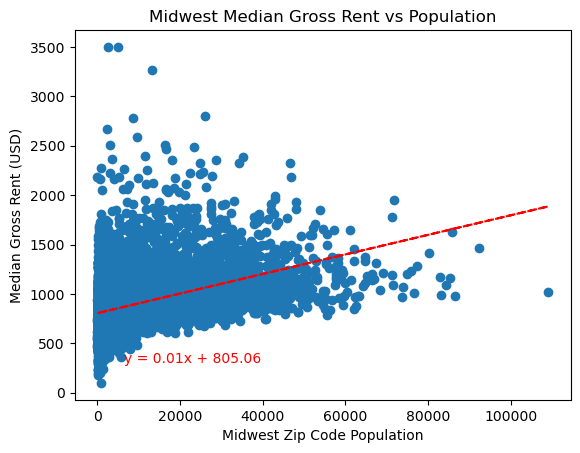

p-value:  0.0
r-value:  0.43108846873397005


In [12]:
mid_poverty = midwest['Poverty Count']/midwest['Population']*100
mid_rent = midwest['Median gross rent']
mid_pop = midwest['Population']
plot_linear_regression(mid_pop, mid_rent, 'Midwest Zip Code Population','Median Gross Rent (USD)', 'Midwest Median Gross Rent vs Population')

In [13]:
midwest['Median gross rent'].sort_values()

20425      99.0
19834     179.0
19593     199.0
21911     200.0
23857     231.0
          ...  
20858    2778.0
20935    2803.0
21154    3272.0
20842    3501.0
21014    3501.0
Name: Median gross rent, Length: 8234, dtype: float64

In [14]:
#Midwest map of rent
mid_map = midwest.hvplot.points("lon", 
                                   "lat", 
                                   geo = True,
                                   color = "Median gross rent",
                                   alpha = 0.8,
                                   tiles = "OSM",
                                   frame_width = 700,
                                   frame_height = 500,
                                   #size = "Poverty Count",
                                   hover_cols = ["zip code", 'Median gross rent']
                                  )

# Display the map
mid_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (Median gross rent,zip code)

In [ ]:
print('Max median gross rent: ', midwest['Median gross rent'].max())

In [ ]:
midwest.loc[midwest['Median gross rent']== 3501.0]

In [ ]:
#Midwest state median rents
state_median = midwest.groupby('state')['Median gross rent'].median()
midwest_chart = state_median.plot.bar()
midwest_chart.set_xlabel("Midwest State")
midwest_chart.set_ylabel("Median Gross Rent (USD)")
plt.savefig('Visuals/mid_rent_bystate.png')

In [ ]:
state_median.max()

In [ ]:
state_median

## Three state comparison

In [16]:
#Establish additional states
ct = states.loc[((states['zip code tabulation area'] >= 6001) & (states['zip code tabulation area']<= 6389) | (states['zip code tabulation area']>=6401) & (states['zip code tabulation area']<= 6928))]
ct['state'] = 'CT'

ca = states.loc[(states['zip code tabulation area'] >= 90001) & (states['zip code tabulation area']<= 96162)]
ca['state'] = "CA"

three_state = pd.concat([mn,ct,ca])
three_state.drop(three_state.loc[three_state['Median gross rent']<=0].index, inplace=True)
three_state

,Poverty Count,Population,Median gross rent,zip code tabulation area,zip code,lat,lon,state
18804,135.0,3902.0,1610.0,55003,55003,45.0214,-92.7844,MN
18805,97.0,4511.0,1521.0,55005,55005,45.3887,-93.2315,MN
18806,464.0,3593.0,885.0,55006,55006,45.7175,-93.2037,MN
18807,194.0,2364.0,937.0,55007,55007,45.9474,-93.0736,MN
18808,1278.0,15589.0,1221.0,55008,55008,45.5576,-93.2889,MN
...,...,...,...,...,...,...,...,...
32392,551.0,3130.0,1225.0,96143,96143,39.2401,-120.0233,CA
32393,57.0,3081.0,1798.0,96145,96145,39.1806,-120.1445,CA
32394,56.0,1147.0,1708.0,96146,96146,39.1752,-120.1954,CA
32396,3263.0,29457.0,1340.0,96150,96150,38.9170,-119.9865,CA


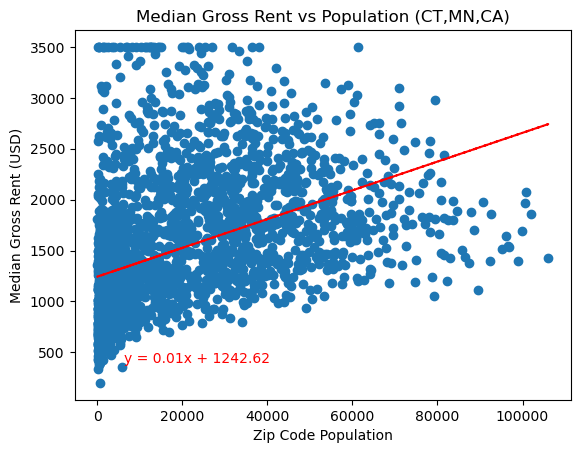

p-value:  4.5623806247318095e-113
r-value:  0.42932446946764463


In [17]:
rent = three_state['Median gross rent']
population = three_state['Population']
plot_linear_regression(population, rent, 'Zip Code Population', 'Median Gross Rent (USD)', 'Median Gross Rent vs Population (CT,MN,CA)')


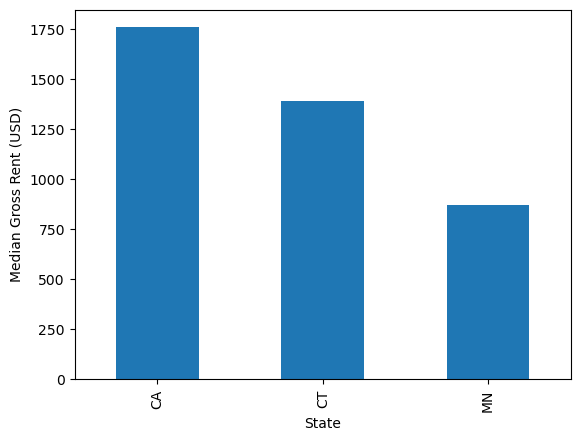

In [18]:
three_state_median = three_state.groupby('state')['Median gross rent'].median()
three_state_chart = three_state_median.plot.bar()
three_state_chart.set_xlabel("State")
three_state_chart.set_ylabel("Median Gross Rent (USD)")
plt.savefig('Visuals/thee_state_rent.png')

In [19]:
#Three state map of rent
three_state_map = three_state.hvplot.points("lon", 
                                   "lat", 
                                   geo = True,
                                   color = "Median gross rent",
                                   alpha = 0.8,
                                   tiles = "OSM",
                                   frame_width = 700,
                                   frame_height = 500,
                                   #size = "Poverty Count",
                                   hover_cols = ["zip code", 'Median gross rent']
                                  )

# Display the map
three_state_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (Median gross rent,zip code)

In [20]:
print('Max median gross rent: ', three_state['Median gross rent'].max())

Max median gross rent:  3501.0


In [21]:
three_state.loc[three_state['Median gross rent']== 3501.0]

,Poverty Count,Population,Median gross rent,zip code tabulation area,zip code,lat,lon,state
1880,158.0,1406.0,3501.0,6481,06481,41.5341,-72.6997,CT
1965,267.0,8096.0,3501.0,6870,06870,41.0354,-73.5673,CT
1969,194.0,10336.0,3501.0,6883,06883,41.2195,-73.3715,CT
1975,303.0,13266.0,3501.0,6903,06903,41.1352,-73.5684,CT
30655,176.0,2653.0,3501.0,90067,90067,34.0551,-118.4095,CA
30663,706.0,11891.0,3501.0,90094,90094,33.9728,-118.4276,CA
30696,289.0,5300.0,3501.0,90290,90290,34.1076,-118.6023,CA
30775,666.0,20389.0,3501.0,91011,91011,34.2217,-118.2051,CA
30789,1137.0,12559.0,3501.0,91108,91108,34.1207,-118.1117,CA
30799,35.0,310.0,3501.0,91210,91210,34.1425,-118.2551,CA


## Scatter plot for each state

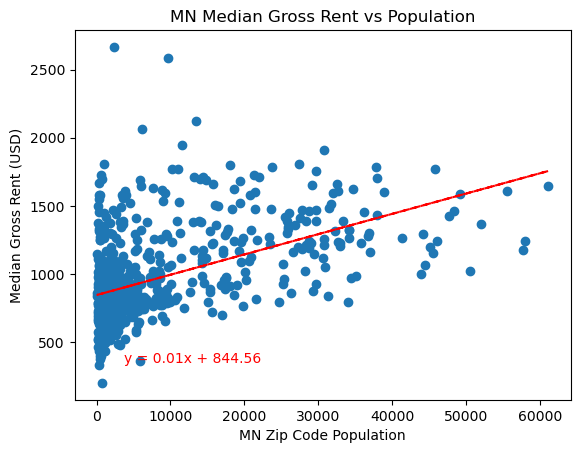

p-value:  4.3899725558934793e-51
r-value:  0.5059132864194481


In [22]:
#Minnesota population vs poverty rate
mn_population = mn['Population']
mn_rent = mn['Median gross rent']
plot_linear_regression(mn_population, mn_rent, 'MN Zip Code Population', 'Median Gross Rent (USD)','MN Median Gross Rent vs Population')


In [23]:
#MN state map of rent
mn_map = mn.hvplot.points("lon", 
                                   "lat", 
                                   geo = True,
                                   color = "Median gross rent",
                                   alpha = 0.8,
                                   tiles = "OSM",
                                   frame_width = 700,
                                   frame_height = 500,
                                   #size = "Poverty Count",
                                   hover_cols = ["zip code", 'Median gross rent']
                                  )

# Display the map
mn_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (Median gross rent,zip code)

In [24]:
print('Max median gross rent: ', mn['Median gross rent'].max())

Max median gross rent:  2667.0


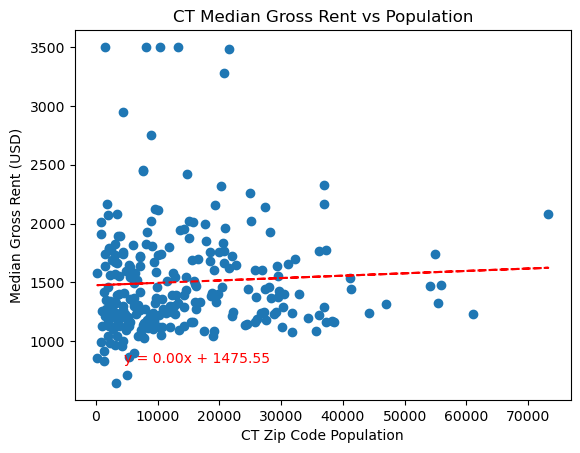

p-value:  0.3873558682566314
r-value:  0.05479436472077658


In [25]:
#CT population vs poverty rate
ct_population = ct['Population']
ct_rent = ct['Median gross rent']
plot_linear_regression(ct_population, ct_rent, 'CT Zip Code Population', 'Median Gross Rent (USD)', 'CT Median Gross Rent vs Population')


In [26]:
#CT state map of rent
ct_map = ct.hvplot.points("lon", 
                                   "lat", 
                                   geo = True,
                                   color = "Median gross rent",
                                   alpha = 0.8,
                                   tiles = "OSM",
                                   frame_width = 700,
                                   frame_height = 500,
                                   #size = "Population",
                                   hover_cols = ["zip code", 'Median gross rent']
                                  )

# Display the map
ct_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (Median gross rent,zip code)

In [27]:
print('Max median gross rent: ', ct['Median gross rent'].max())

Max median gross rent:  3501.0


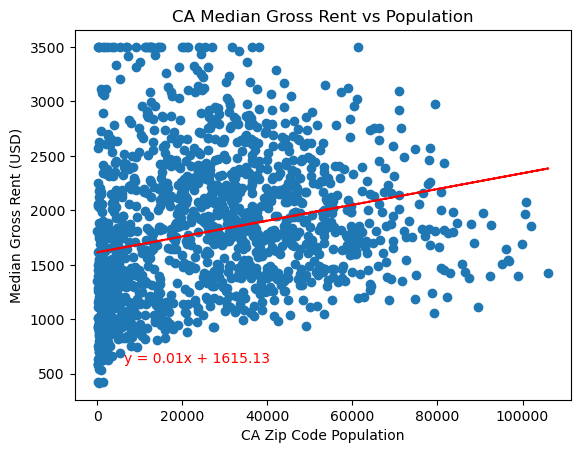

p-value:  6.971734880701124e-22
r-value:  0.24537290135995182


In [28]:
#CA population vs poverty rate
ca_population = ca['Population']
ca_rent = ca['Median gross rent']
plot_linear_regression(ca_population, ca_rent, 'CA Zip Code Population', 'Median Gross Rent (USD)','CA Median Gross Rent vs Population')


In [29]:
#CA state map of rent
ca_map = ca.hvplot.points("lon", 
                                   "lat", 
                                   geo = True,
                                   color = "Median gross rent",
                                   alpha = 0.8,
                                   tiles = "OSM",
                                   frame_width = 700,
                                   frame_height = 500,
                                   #size = "Poverty Count",
                                   hover_cols = ["zip code", 'Median gross rent']
                                  )

# Display the map
ca_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (Median gross rent,zip code)

In [30]:
print('Max median gross rent: ', ca['Median gross rent'].max())

Max median gross rent:  3501.0


## T-tests

In [31]:
# Null - there is no difference in median gross rent between california and minnesota zip codes
ca_rent = three_state.loc[three_state['state']== 'CA']

mn_rent = three_state.loc[three_state['state']=='MN']

stats.ttest_ind(ca_rent['Median gross rent'], mn_rent['Median gross rent'], equal_var=False)

#Reject the null

TtestResult(statistic=41.19619260403348, pvalue=5.713259214836781e-277, df=2251.4324366293295)

In [32]:
#Null there is no difference in median gross rent between connecticut and minnesota zip codes
ct_rent = three_state.loc[three_state['state']== 'CT']

stats.ttest_ind(ct_rent['Median gross rent'], mn_rent['Median gross rent'], equal_var=False)

#Reject the null

TtestResult(statistic=17.192002233386305, pvalue=9.542390049127288e-48, df=329.8336823631668)

In [33]:
#Null there is no difference in median gross rent between connecticut and california zip codes
stats.ttest_ind(ct_rent['Median gross rent'], ca_rent['Median gross rent'], equal_var=False)

#Reject the null

TtestResult(statistic=-8.76985807329645, pvalue=4.130845577290395e-17, df=432.96996905803456)